# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
weather_json=[]

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)



url = "http://api.openweathermap.org/data/2.5/weather?&appid=" + weather_api_key + "&q="
# Print the city count to confirm sufficient count
len(cities)

653

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [42]:
weather_json=[]
city_name=[]
lat = []
lng=[]
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country =[]
date =[]
x=1
print ("Beginning Data Retrieval")
print ("-----------------------------")

for city in cities:
    target_url = url + str(city)
    response= requests.get(target_url)
    weather_response = requests.get(target_url).json()
    if response.status_code == 404:
            print(f"{city} not found. Skipping...")
            x=x+1
            next

    else:
        print(f"Processing Record {x} | {city}")
        #weather_response = requests.get(url+ str(city))
        #weather_json.append(weather_response.json())
        city_name.append(city)
        lat.append(weather_response['coord']['lat'])
        lng.append(weather_response['coord']['lon'])
        max_temp.append(weather_response['main']['temp_max'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds']['all'])
        wind_speed.append(weather_response['wind']['speed'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt'])
        x=x+1


Beginning Data Retrieval
-----------------------------
Processing Record 1 | port alfred
Processing Record 2 | hithadhoo
Processing Record 3 | atuona
Processing Record 4 | bhuj
Processing Record 5 | ushuaia
taolanaro not found. Skipping...
Processing Record 7 | barcelona
Processing Record 8 | sao filipe
Processing Record 9 | namatanai
Processing Record 10 | punta arenas
Processing Record 11 | villa carlos paz
Processing Record 12 | hilo
Processing Record 13 | nanortalik
Processing Record 14 | chokurdakh
Processing Record 15 | khani
attawapiskat not found. Skipping...
tsihombe not found. Skipping...
Processing Record 18 | hasaki
Processing Record 19 | kihei
Processing Record 20 | nikolskoye
Processing Record 21 | hearst
Processing Record 22 | ribeira grande
Processing Record 23 | new norfolk
Processing Record 24 | upernavik
Processing Record 25 | trairi
Processing Record 26 | longyearbyen
Processing Record 27 | acajutla
Processing Record 28 | kafanchan
Processing Record 29 | kirkenaer
P

Processing Record 249 | karacabey
Processing Record 250 | stokmarknes
Processing Record 251 | hambantota
tumannyy not found. Skipping...
Processing Record 253 | narsaq
Processing Record 254 | vostok
Processing Record 255 | butka
Processing Record 256 | otane
Processing Record 257 | pirapozinho
Processing Record 258 | kaabong
Processing Record 259 | port macquarie
Processing Record 260 | souillac
Processing Record 261 | vila velha
Processing Record 262 | arraial do cabo
Processing Record 263 | maragogi
Processing Record 264 | kapaa
Processing Record 265 | mecca
Processing Record 266 | kieta
Processing Record 267 | dikson
Processing Record 268 | todos santos
Processing Record 269 | kahului
Processing Record 270 | ryotsu
Processing Record 271 | sibolga
Processing Record 272 | zhangjiakou
Processing Record 273 | bronnoysund
Processing Record 274 | nayoro
Processing Record 275 | marystown
Processing Record 276 | port blair
saleaula not found. Skipping...
amderma not found. Skipping...
Proce

Processing Record 495 | northam
Processing Record 496 | sagua de tanamo
Processing Record 497 | palora
Processing Record 498 | baruun-urt
Processing Record 499 | bafoulabe
Processing Record 500 | dong xoai
Processing Record 501 | huarmey
galiwinku not found. Skipping...
Processing Record 503 | ekibastuz
Processing Record 504 | pasni
fevralsk not found. Skipping...
Processing Record 506 | karratha
Processing Record 507 | ous
Processing Record 508 | abu kamal
Processing Record 509 | nishihara
Processing Record 510 | vestmannaeyjar
Processing Record 511 | hami
Processing Record 512 | cotonou
Processing Record 513 | dunedin
Processing Record 514 | daru
Processing Record 515 | coolum beach
Processing Record 516 | kharabali
Processing Record 517 | cuenca
Processing Record 518 | okhotsk
Processing Record 519 | marsa matruh
Processing Record 520 | san cristobal
Processing Record 521 | verkhnevilyuysk
Processing Record 522 | storforshei
Processing Record 523 | gondar
Processing Record 524 | len

In [163]:
weather_dict = {
    "City": city_name,
    "Lat": lat,
    "Lng" : lng,
    "Max Temp in F": (np.asarray(max_temp)- 273.15) * 9/5 + 32,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Lat,Lng,Max Temp in F,Humidity,Cloudiness,Wind Speed,Country,Date
0,port alfred,-33.5906,26.8910,66.002,89,38,3.73,ZA,1612487409
1,hithadhoo,-0.6000,73.0833,82.076,77,100,4.97,MV,1612487597
2,atuona,-9.8000,-139.0333,78.656,71,4,4.54,PF,1612487597
3,bhuj,23.2667,69.6667,58.568,48,0,3.57,IN,1612487598
4,ushuaia,-54.8000,-68.3000,46.400,81,20,15.43,AR,1612487346
...,...,...,...,...,...,...,...,...,...
603,krasnoselkup,65.7000,82.4667,-23.620,86,36,2.98,RU,1612487945
604,dukat,62.5500,155.5500,-20.542,84,100,1.97,RU,1612487946
605,chapais,49.7834,-74.8492,15.800,86,1,1.19,CA,1612487946
606,ahipara,-35.1667,173.1667,70.466,63,100,2.22,NZ,1612487947


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [121]:
weather_data.to_csv ("../VacationPy/Input/weather_data.csv", index = False, header=True)
weather_data

,City,Lat,Lng,Max Temp in F,Humidity,Cloudiness,Wind Speed,Country,Date
0,port alfred,-33.5906,26.8910,66.002,89,38,3.73,ZA,1612487409
1,hithadhoo,-0.6000,73.0833,82.076,77,100,4.97,MV,1612487597
2,atuona,-9.8000,-139.0333,78.656,71,4,4.54,PF,1612487597
3,bhuj,23.2667,69.6667,58.568,48,0,3.57,IN,1612487598
4,ushuaia,-54.8000,-68.3000,46.400,81,20,15.43,AR,1612487346
...,...,...,...,...,...,...,...,...,...
603,krasnoselkup,65.7000,82.4667,-23.620,86,36,2.98,RU,1612487945
604,dukat,62.5500,155.5500,-20.542,84,100,1.97,RU,1612487946
605,chapais,49.7834,-74.8492,15.800,86,1,1.19,CA,1612487946
606,ahipara,-35.1667,173.1667,70.466,63,100,2.22,NZ,1612487947


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [122]:
dry_weather=weather_data.loc[weather_data["Humidity"]<100]
dry_weather

,City,Lat,Lng,Max Temp in F,Humidity,Cloudiness,Wind Speed,Country,Date
0,port alfred,-33.5906,26.8910,66.002,89,38,3.73,ZA,1612487409
1,hithadhoo,-0.6000,73.0833,82.076,77,100,4.97,MV,1612487597
2,atuona,-9.8000,-139.0333,78.656,71,4,4.54,PF,1612487597
3,bhuj,23.2667,69.6667,58.568,48,0,3.57,IN,1612487598
4,ushuaia,-54.8000,-68.3000,46.400,81,20,15.43,AR,1612487346
...,...,...,...,...,...,...,...,...,...
603,krasnoselkup,65.7000,82.4667,-23.620,86,36,2.98,RU,1612487945
604,dukat,62.5500,155.5500,-20.542,84,100,1.97,RU,1612487946
605,chapais,49.7834,-74.8492,15.800,86,1,1.19,CA,1612487946
606,ahipara,-35.1667,173.1667,70.466,63,100,2.22,NZ,1612487947


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [123]:
#  Get the indices of cities that have humidity over 100%.
wet_weather=weather_data["Humidity"].loc[lambda x: x>=100].index
wet_weather

Int64Index([142, 161, 184, 187, 191, 213, 234, 262, 275, 336, 348, 354, 364,
            399, 407, 408, 543, 551, 578],
           dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

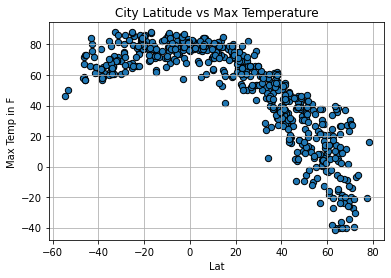

In [124]:
dry_weather.plot.scatter('Lat','Max Temp in F',edgecolors="black",
                         grid=True, title='City Latitude vs Max Temperature', s=40)

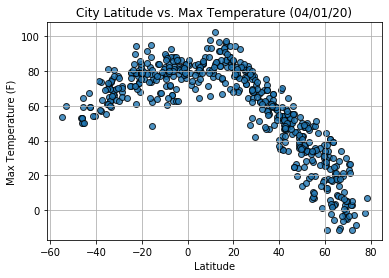

## Latitude vs. Humidity Plot

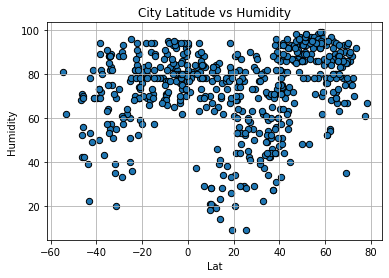

In [142]:
dry_weather.plot.scatter('Lat','Humidity',edgecolors="black",
                         grid=True, title='City Latitude vs Humidity', s=40)

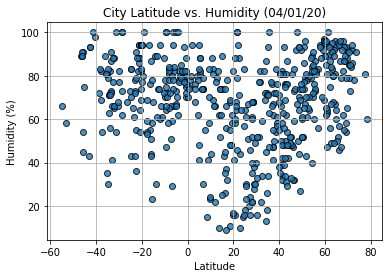

## Latitude vs. Cloudiness Plot

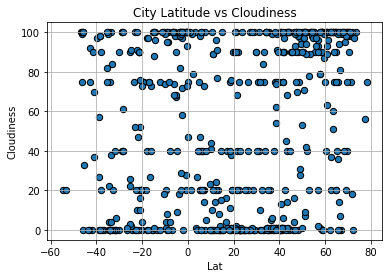

In [79]:
dry_weather.plot.scatter('Lat','Cloudiness', edgecolors="black", grid=True, title='City Latitude vs Cloudiness',s=40)

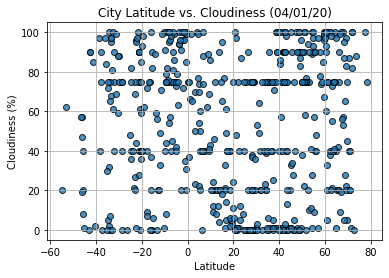

## Latitude vs. Wind Speed Plot

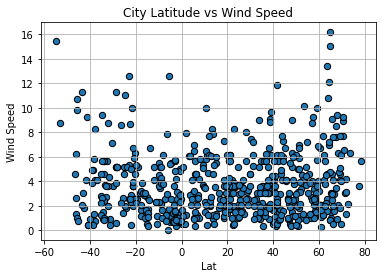

In [77]:
dry_weather.plot.scatter('Lat','Wind Speed', edgecolors="black", grid=True, title='City Latitude vs Wind Speed', s=40)

## Linear Regression

In [162]:
south=dry_weather.loc[dry_weather["Lat"]<=0]
north=dry_weather.loc[dry_weather["Lat"]>=0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8808596205722328


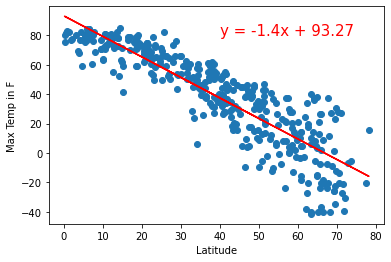

In [137]:
lat_nh=north["Lat"].tolist()
y_nh=north["Max Temp in F"].tolist()
lat_nh=np.asarray(lat_nh)
plt.scatter(lat_nh,y_nh)
plt.xlabel("Latitude")
plt.ylabel("Max Temp in F")
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_nh, y_nh)
regress_values = lat_nh * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_nh,regress_values,"r-")
plt.annotate(line_eq,(40, 80),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5668494220234729


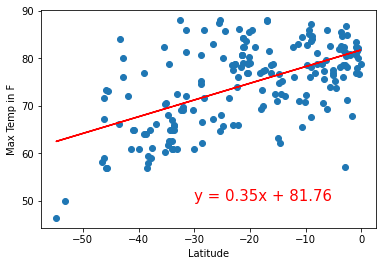

In [136]:
lat_sh=south["Lat"].tolist()
y_sh=south["Max Temp in F"].tolist()
lat_sh=np.asarray(lat_sh)
plt.scatter(lat_sh,y_sh)
plt.xlabel("Latitude")
plt.ylabel("Max Temp in F")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_sh, y_sh)
regress_values = lat_sh * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_sh,regress_values,"r-")
plt.annotate(line_eq,(-30, 50),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3537867288563558


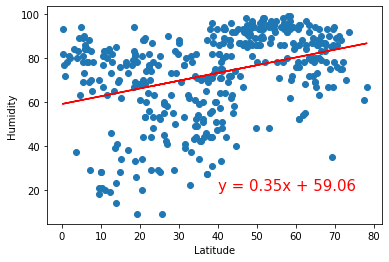

In [140]:
y_nh=north["Humidity"].tolist()
plt.scatter(lat_nh,y_nh)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_nh, y_nh)
regress_values = lat_nh * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_nh,regress_values,"r-")
plt.annotate(line_eq,(40, 20),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.40418695930132653


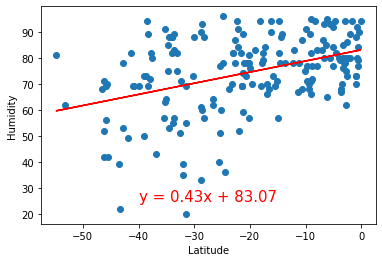

In [161]:
y_sh=south["Humidity"].tolist()
plt.scatter(lat_sh,y_sh)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_sh, y_sh)
regress_values = lat_sh * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_sh,regress_values,"r-")
plt.annotate(line_eq,(-40, 25),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.3916728972476657


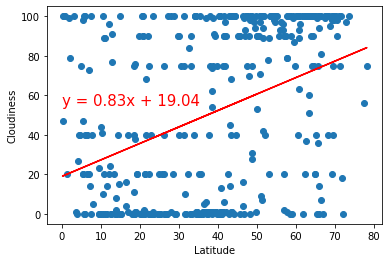

In [158]:
y_nh=north["Cloudiness"].tolist()
plt.scatter(lat_nh,y_nh)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_nh, y_nh)
regress_values = lat_nh * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_nh,regress_values,"r-")
plt.annotate(line_eq,(0, 55),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.24770708751484327


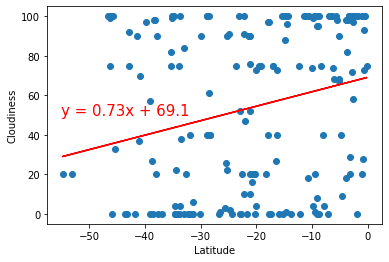

In [155]:
y_sh=south["Cloudiness"].tolist()
plt.scatter(lat_sh,y_sh)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_sh, y_sh)
regress_values = lat_sh * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_sh,regress_values,"r-")
plt.annotate(line_eq,(-55, 50),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.3916728972476657


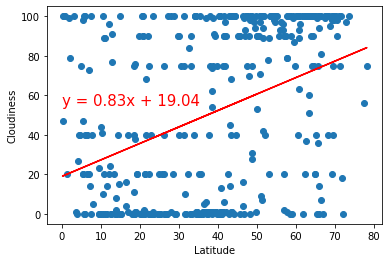

In [150]:
y_nh=north["Cloudiness"].tolist()
plt.scatter(lat_nh,y_nh)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_nh, y_nh)
regress_values = lat_nh * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_nh,regress_values,"r-")
plt.annotate(line_eq,(0, 55),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.2726010947882192


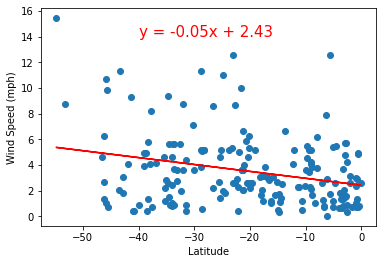

In [147]:
y_sh=south["Wind Speed"].tolist()
plt.scatter(lat_sh,y_sh)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_sh, y_sh)
regress_values = lat_sh * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_sh,regress_values,"r-")
plt.annotate(line_eq,(-40, 14),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()